# 1. Import the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
file_path = "../data_sets/dataset_raw.csv"
data = pd.read_csv(file_path)

FileNotFoundError: [Errno 2] No such file or directory: '../data_sets/dataset_raw.csv'

## 1.1 Encoder 1 - CountVectorizer

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [26]:
'''
parameter explanation:
stop_words = ''english'' -> remove “and”, “the”, “him”, which are presumed to be uninformative in representing the content of a text
min_df = 0.02 -> When building the vocabulary -> ignore terms that have a document frequency < 0.02
ngram_range = (1,1)  unigram -> tal
'''
vectorizer_try = CountVectorizer(stop_words='english',min_df=0.02, ngram_range=(1, 1))
X_try = vectorizer_try.fit_transform(X_train[0:4])
print('Data shape: ', X_try.shape)

Data shape:  (4, 20)


### Note:
why min_df = 0.02? Or How do we represent rarely appeared words?

**Option 1: the UNK token**

Replace all rare words (with a frequency at or below a given threshold, e.g. 2,
3, or 5) in your training data with an UNK token (UNK = “Unknown word”).  
Replace all unknown words that you come across after training (including rare
training words) with the same UNK token

**Option 2: substring-based representations**  
[often used in neural models]  
Represent (rare and unknown) words [“Champaign”] as sequences of
characters [‘C’, ‘h’, ‘a’,…,’g’, ’n'] or substrings [“Ch”, “amp”, “ai”, “gn”]

In [27]:
vectorizer_try.get_feature_names_out()

array(['awake', 'cares', 'damned', 'didnt', 'feel', 'feeling',
       'fireplace', 'grabbing', 'greedy', 'hopeful', 'hopeless',
       'humiliated', 'im', 'just', 'know', 'minute', 'nostalgic', 'post',
       'property', 'wrong'], dtype=object)

In [28]:
dense_matrix = pd.DataFrame(X_try.toarray(), columns=vectorizer_try.get_feature_names_out())
dense_matrix

,awake,cares,damned,didnt,feel,feeling,fireplace,grabbing,greedy,hopeful,hopeless,humiliated,im,just,know,minute,nostalgic,post,property,wrong
0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,1,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1
3,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0


In [29]:
# The function will generates a histogram to show how many unique words (from the vocabulary) are in each review
def review_word_count_histgram(X):
    '''
    X:  [# feature vectors, # features], feature vectors
    '''
    ### YOUR CODE STARTS HERE ###
    fig, axes = plt.subplots()

    dens = np.sum(X > 0, axis=1) # get unique word density for each comment
    axes.hist(dens, bins=30, edgecolor='black')
    axes.set_xlabel('Word counts', fontsize=14)

"\nInterpret:\nthere is 1 record has 3 unique words. (i didnt feel humiliated -> didnt, feel, humiliated)\nthere is 2 record has 7 unique words. ('im grabbing a minute to post i feel greedy wrong -> grabbing, minute, post, feel, greedy, wrong, im)\n\nWhat do we need to know that?\nThat essentially calculate how many features a post has.\n"

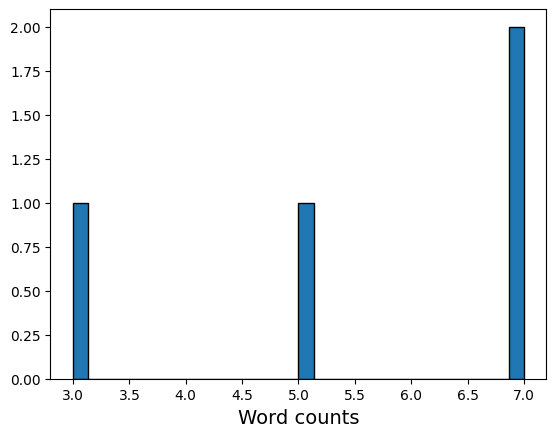

In [30]:
review_word_count_histgram(X_try)
#
'''
Interpret:
there is 1 record has 3 unique words. (i didnt feel humiliated -> didnt, feel, humiliated)
there is 2 record has 7 unique words. ('im grabbing a minute to post i feel greedy wrong -> grabbing, minute, post, feel, greedy, wrong, im)

What do we need to know that?
That essentially calculate how many features a post has.
'''

In [31]:
# min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
vectorizer_try = CountVectorizer(stop_words='english',min_df=0.01, ngram_range=(1, 1))
X_train_1 = vectorizer_try.fit_transform(X_train)
print('Data shape: ', X_train_1.shape)

Data shape:  (16000, 72)


In [32]:
vectorizer_try = CountVectorizer(stop_words='english',min_df=0.01, ngram_range=(1, 3))
X_val_1 = vectorizer_try.fit_transform(X_val)
print('Data shape: ', X_val_1.shape)

Data shape:  (2000, 91)


In [33]:
vectorizer_try = CountVectorizer(stop_words='english',min_df=0.01, ngram_range=(1, 1))
X_test_1 = vectorizer_try.fit_transform(X_test)
print('Data shape: ', X_test_1.shape)

Data shape:  (2000, 83)


## See? that could be a problem, we must encode the entire dataset first and then split.

In [34]:
X_all = np.concatenate((X_train, X_val, X_test), axis=0)
X_all.shape

(20000,)

In [35]:
y_all = np.concatenate((y_train, y_val, y_test), axis = 0)
y_all.shape

(20000,)

## Start working here!!!!


In [36]:
vectorizer_try = CountVectorizer(stop_words='english',min_df=0.002, ngram_range=(1, 3))
X_1 = vectorizer_try.fit_transform(X_all)
print('Data shape: ', X_1.shape)

Data shape:  (20000, 854)


In [37]:
vectorizer_try = CountVectorizer(stop_words='english',min_df=0.005, ngram_range=(1, 1))
X_train_1 = vectorizer_try.fit_transform(X_train)
print('Data shape: ', X_train_1.shape)

Data shape:  (16000, 216)


In [38]:
y_1 = y_all.copy()

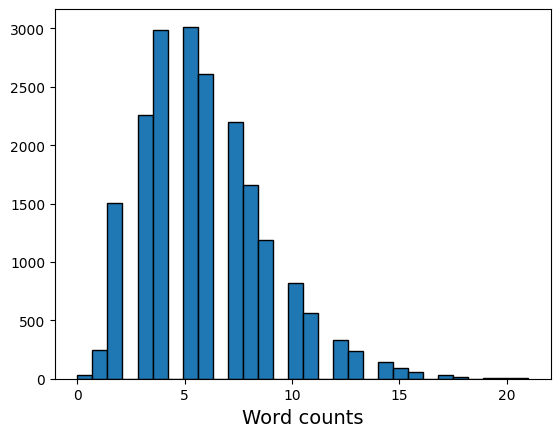

In [39]:
review_word_count_histgram(X_1)

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
def logistic_classification(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Specify the logistic classifier model with 'l2' penalty
    classifier = LogisticRegression(penalty='l2', solver='saga', fit_intercept=True, multi_class='multinomial', random_state=42)
    classifier.fit(X_train, y_train)

    # Compute and print accuracy on the test data
    test_predictions = classifier.predict(X_test)
    test_accuracy = np.mean(test_predictions == y_test)

    print('\nTesting accuracy:', format(100 * test_accuracy, '.2f'))

    # Compute and print the confusion matrix
    cm = confusion_matrix(y_test, test_predictions)
    print('\nConfusion Matrix:')
    print(cm)

    return classifier

In [42]:
logistic_classification(X_1, y_1)


Testing accuracy: 84.33

Confusion Matrix:
[[1577  128    8   47   33    3]
 [  64 1806   72   12   13    7]
 [  12  106  371    6    3    1]
 [  70   85    6  645   20    2]
 [  53   67    3   28  507   24]
 [   6   18    1    4   38  154]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', random_state=42, solver='saga')

In [43]:
# maybe my data engineer is not correct? this time only try data_train.
logistic_classification(X_train_1, y_train)
# No


Testing accuracy: 44.40

Confusion Matrix:
[[ 651  674    4   71   31    3]
 [ 305 1179   40   35   16    6]
 [ 105  242   68   12    5    2]
 [ 208  283    3   96   15    2]
 [ 162  233    3   25  121   22]
 [  44   83    3    3   29   16]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', random_state=42, solver='saga')

In [44]:
# imbalance data? can be a reason
y_train_series = pd.Series(y_train)
y_train_value_counts = y_train_series.value_counts()
y_train_value_counts

1    5362
0    4666
3    2159
4    1937
2    1304
5     572
dtype: int64

# conclusion:
A Naive logistic regression is not able to generate an ideal result. There are many things to consider, for example:
* Class imbalance
* The parameter of encoder is not well optimized.
* The logistic regression is not well optimized.

In [45]:
# X_1 downsampling to make each class have similar number

In [46]:
type(X_1)

scipy.sparse._csr.csr_matrix

In [47]:
X_1.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [48]:
X_1_df_dense = pd.DataFrame(X_1.toarray())
X_1_df_dense

,0,1,2,3,4,5,6,7,8,9,...,844,845,846,847,848,849,850,851,852,853
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
y_1_df = pd.DataFrame(y_1,  columns=['label'])
y_1_df

,label
0,0
1,0
2,3
3,2
4,3
...,...
19995,3
19996,3
19997,1
19998,1


In [50]:
df_1 = pd.concat([y_1_df, X_1_df_dense], axis=1)
df_1

,label,0,1,2,3,4,5,6,7,8,...,844,845,846,847,848,849,850,851,852,853
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
19996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df_1['label'].value_counts()

1    6761
0    5797
3    2709
4    2373
2    1641
5     719
Name: label, dtype: int64

In [52]:
target_sample_size = 719

# Create a function to downsample each group to the target size
def downsample_group(group):
    if len(group) > target_sample_size:
        return group.sample(target_sample_size)
    else:
        return group

# Apply the downsample_group function to each group based on the 'label' column
balanced_df = df_1.groupby('label', group_keys=False).apply(downsample_group)

# Now downsampled_df contains an equal number of samples for each class

# You can check the value counts to ensure that all classes have the same number of samples
print(balanced_df['label'].value_counts())

0    719
1    719
2    719
3    719
4    719
5    719
Name: label, dtype: int64


In [53]:
balanced_df.head()

,label,0,1,2,3,4,5,6,7,8,...,844,845,846,847,848,849,850,851,852,853
16001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
y_1_balanced = balanced_df['label']

In [55]:
X_1_balanced = balanced_df.iloc[:, 1:]

In [56]:
logistic_classification(X_1_balanced, y_1_balanced)


Testing accuracy: 80.69

Confusion Matrix:
[[173  21   5  13  15   2]
 [ 12 173  24  12   7   2]
 [  5  10 193   5   0   1]
 [ 13  12   2 169  13   2]
 [ 10  16   2  10 144  15]
 [  1   6   0   1  13 193]]


LogisticRegression(multi_class='multinomial', random_state=42, solver='saga')